In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Multiclass clasification

train = pd.read_csv('/kaggle/input/mobility-analytics/train_Wc8LBpr.csv')
test = pd.read_csv('/kaggle/input/mobility-analytics/test_VsU9xXK.csv')
train.shape, test.shape

((131662, 14), (87395, 13))

In [3]:
whole = train.append(test)  # combining train and test
print(whole.shape)

whole.head()

(219057, 14)


,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2.0
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2.0
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2.0
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3.0
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2.0


In [4]:
whole.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219057 entries, 0 to 87394
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      219057 non-null  object 
 1   Trip_Distance                219057 non-null  float64
 2   Type_of_Cab                  185689 non-null  object 
 3   Customer_Since_Months        209171 non-null  float64
 4   Life_Style_Index             185537 non-null  float64
 5   Confidence_Life_Style_Index  185537 non-null  object 
 6   Destination_Type             219057 non-null  object 
 7   Customer_Rating              219057 non-null  float64
 8   Cancellation_Last_1Month     219057 non-null  int64  
 9   Var1                         101238 non-null  float64
 10  Var2                         219057 non-null  int64  
 11  Var3                         219057 non-null  int64  
 12  Gender                       219057 non-null  object 
 13  

In [5]:
# Proportion of missing values in each column
whole.isnull().sum()/whole.shape[0]

Trip_ID                        0.000000
Trip_Distance                  0.000000
Type_of_Cab                    0.152326
Customer_Since_Months          0.045130
Life_Style_Index               0.153020
Confidence_Life_Style_Index    0.153020
Destination_Type               0.000000
Customer_Rating                0.000000
Cancellation_Last_1Month       0.000000
Var1                           0.537846
Var2                           0.000000
Var3                           0.000000
Gender                         0.000000
Surge_Pricing_Type             0.398960
dtype: float64

In [6]:
whole['Trip_Distance'].describe()

count    219057.000000
mean         44.158725
std          25.507368
min           0.310000
25%          24.560000
50%          38.140000
75%          60.720000
max         109.230000
Name: Trip_Distance, dtype: float64

In [7]:
whole['Cancellation_Last_1Month'].describe()

count    219057.000000
mean          0.782915
std           1.036244
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           8.000000
Name: Cancellation_Last_1Month, dtype: float64

In [8]:
whole['Customer_Rating'].describe()

count    219057.000000
mean          2.848632
std           0.981100
min           0.001250
25%           2.152500
50%           2.895000
75%           3.581250
max           5.000000
Name: Customer_Rating, dtype: float64

In [9]:
print(whole['Customer_Since_Months'].describe())

# Filling missing values
whole['Customer_Since_Months'].fillna(value=0, inplace=True)
print('After:\n',whole['Customer_Since_Months'].value_counts())

count    209171.000000
mean          6.006048
std           3.626891
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: Customer_Since_Months, dtype: float64
After:
 10.0    70817
0.0     26771
2.0     19445
3.0     17074
5.0     14405
1.0     13965
4.0     13035
7.0     12332
6.0     12279
8.0     10525
9.0      8409
Name: Customer_Since_Months, dtype: int64


In [10]:
# Handling missing values in column (Type_of_cab)
print('Before:\n',whole['Type_of_Cab'].value_counts())

whole['Type_of_Cab'].fillna('unknown', inplace=True)
print('After:\n',whole['Type_of_Cab'].value_counts())

Before:
 B    51585
C    46732
A    35878
D    31885
E    19609
Name: Type_of_Cab, dtype: int64
After:
 B          51585
C          46732
A          35878
unknown    33368
D          31885
E          19609
Name: Type_of_Cab, dtype: int64


In [11]:
# Handling missing values in column (Confidence_Life_Style_Index)
print('Before:\n',whole['Confidence_Life_Style_Index'].value_counts())

whole['Confidence_Life_Style_Index'].fillna('unknown', inplace=True)
print('After:\n',whole['Confidence_Life_Style_Index'].value_counts())

Before:
 B    67265
C    59736
A    58536
Name: Confidence_Life_Style_Index, dtype: int64
After:
 B          67265
C          59736
A          58536
unknown    33520
Name: Confidence_Life_Style_Index, dtype: int64


In [12]:
#whole['Life_Style_Index'].value_counts()
whole['Life_Style_Index'].describe()

count    185537.000000
mean          2.802594
std           0.226323
min           1.317850
25%           2.654620
50%           2.798280
75%           2.947650
max           4.875110
Name: Life_Style_Index, dtype: float64

In [13]:
whole['Life_Style_Index'].fillna(whole['Life_Style_Index'].mean(), inplace=True)
print('After:\n',whole['Life_Style_Index'].describe())

After:
 count    219057.000000
mean          2.802594
std           0.208288
min           1.317850
25%           2.688050
50%           2.802594
75%           2.913910
max           4.875110
Name: Life_Style_Index, dtype: float64


In [14]:
# Handling of Var1
print(whole['Var1'].describe())
whole['Var1'].fillna(whole['Var1'].mean(), inplace=True)

count    101238.000000
mean         64.095972
std          21.747037
min          30.000000
25%          46.000000
50%          61.000000
75%          79.000000
max         210.000000
Name: Var1, dtype: float64


In [15]:
# label encoding of Destination_Type
whole['Destination_Type'].value_counts()    

A    129010
B     49193
C     12397
D     11085
E      4549
F      3222
G      2513
H      2124
I      1334
J      1166
K      1102
L      1052
M       160
N       150
Name: Destination_Type, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
whole['Destination_Type'] = le.fit_transform(whole['Destination_Type'])

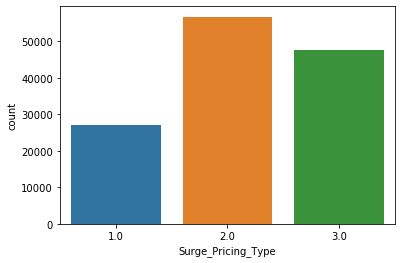

In [17]:
# Data analysis and visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Plot showing pricing types
sns.countplot(whole['Surge_Pricing_Type'])

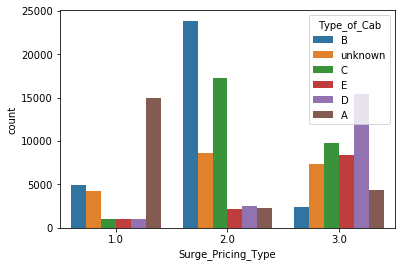

In [18]:
# relation to pricing
sns.countplot(x='Surge_Pricing_Type', hue='Type_of_Cab', data=whole)

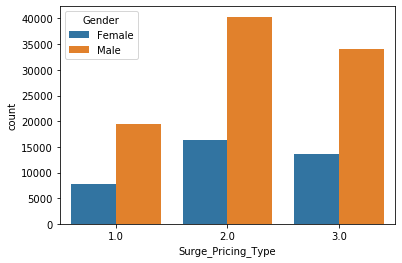

In [19]:
# Plot showing pricing types vs. Gender
sns.countplot(x='Surge_Pricing_Type', hue='Gender', data=whole)

Text(0.5, 0, 'Trip_distance')

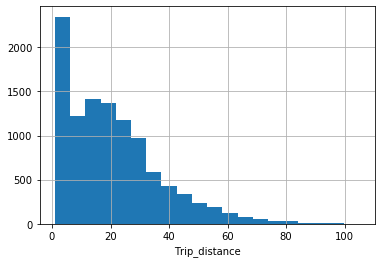

In [20]:
# Distribution of Trip_distance
whole['Trip_Distance'].value_counts().hist(bins=20)
plt.xlabel('Trip_distance')

In [21]:
# Dummy variable creation for gender
cat_df = whole.select_dtypes(include=['object']).drop('Trip_ID', axis=1)
cat_cols = cat_df.columns
#cat_cols
#cat_cols.head()
for col in cat_cols:
    whole = pd.concat([whole.drop(col, axis=1), pd.get_dummies(whole[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)

In [22]:
clean_train = whole[whole['Surge_Pricing_Type'].isnull()==False].drop(['Trip_ID'], axis=1)
clean_train.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Type_of_Cab_unknown,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Confidence_Life_Style_Index_unknown,Gender_Male
0,6.77,1.0,2.427690,0,3.90500,0,40.000000,46,60,2.0,1,0,0,0,0,0,0,0,0
1,29.47,10.0,2.782450,0,3.45000,0,38.000000,56,78,2.0,1,0,0,0,0,1,0,0,1
2,41.58,10.0,2.802594,4,3.50125,2,64.095972,56,77,2.0,0,0,0,0,1,0,0,1,1
3,61.56,10.0,2.802594,0,3.45375,0,64.095972,52,74,3.0,0,1,0,0,0,0,0,1,1
4,54.95,10.0,3.034530,0,3.40250,4,51.000000,49,102,2.0,0,1,0,0,0,1,0,0,1


In [23]:
x_test = whole[whole['Surge_Pricing_Type'].isnull()==True].drop(['Trip_ID', 'Surge_Pricing_Type'], axis=1)
x_test.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Type_of_Cab_unknown,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Confidence_Life_Style_Index_unknown,Gender_Male
0,9.44,10.0,2.57438,1,3.68000,2,64.095972,46,63,0,0,0,0,0,0,0,0,1
1,32.15,10.0,2.85143,0,1.59375,0,65.000000,49,80,1,0,0,0,0,0,0,0,0
2,10.38,4.0,2.70530,3,4.50500,0,64.095972,47,74,0,1,0,0,0,0,0,0,1
3,14.94,6.0,2.48159,4,4.53000,0,63.000000,43,54,0,0,0,0,1,0,1,0,1
4,32.03,7.0,2.81598,10,4.60125,3,96.000000,44,56,1,0,0,0,0,0,0,0,1


In [24]:
y = clean_train['Surge_Pricing_Type']
clean_train.shape, y.shape, x_test.shape

((131662, 19), (131662,), (87395, 18))

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_valid, y_train, y_valid = train_test_split(clean_train.drop('Surge_Pricing_Type', axis=1), y, test_size=0.25, random_state=10)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x_train)
sc.transform(x_valid)

array([[-1.06292788e+00, -4.64600293e-01,  1.33297187e+00, ...,
         1.63094155e+00, -4.25444152e-01,  6.34650712e-01],
       [ 2.16797035e+00,  6.73087455e-02,  3.95033807e-01, ...,
        -6.13142757e-01, -4.25444152e-01,  6.34650712e-01],
       [-1.21993909e+00,  8.65172303e-01, -5.72885118e-01, ...,
        -6.13142757e-01, -4.25444152e-01,  6.34650712e-01],
       ...,
       [-1.17519090e+00,  3.33263265e-01,  2.41327786e-04, ...,
        -6.13142757e-01,  2.35048477e+00, -1.57566986e+00],
       [ 1.64507275e-01,  1.13112682e+00,  9.38689877e-01, ...,
         1.63094155e+00, -4.25444152e-01, -1.57566986e+00],
       [ 3.20340904e-01,  1.13112682e+00, -9.17453984e-02, ...,
         1.63094155e+00, -4.25444152e-01, -1.57566986e+00]])

In [27]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimators=500, n_jobs=2)
model_xgb.fit(x_train, y_train,
             early_stopping_rounds=5,
             eval_set=[(x_valid, y_valid)], verbose=False)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [28]:
pred_xgb = model_xgb.predict(x_valid)   # Prediction

In [29]:
accuracy_score(y_valid, pred_xgb)    # Accuracy

0.7102321059667032

In [30]:
# Prediction on Test data
pred_test = model_xgb.predict(x_test)

In [31]:
# Save test prediction As Dataframe 
submission = pd.DataFrame(pred_test, index=(test['Trip_ID']), columns=['Surge_Pricing_Type'])
print(submission.head())
print()
print('Surge_Pricing_Type \n', submission['Surge_Pricing_Type'].value_counts())

             Surge_Pricing_Type
Trip_ID                        
T0005689459                 1.0
T0005689462                 2.0
T0005689463                 2.0
T0005689466                 2.0
T0005689468                 2.0

Surge_Pricing_Type 
 2.0    44562
3.0    29302
1.0    13531
Name: Surge_Pricing_Type, dtype: int64
